In [1]:
import pandas as pd

df1 = pd.read_csv("student_career_data.csv")
df = df1.copy()
df.head()

,Analytical Thinking,Problem Solving,Creativity,Communication Skills,Leadership,Empathy,Teamwork,Scientific Interest,Technological Interest,Design Skills,...,Medical Knowledge,Legal Knowledge,Business Acumen,Research Skills,Marketing Skills,Teaching Skills,Software Development Knowledge,Artistic Skills,Attention to Detail,Career
0,4,3,1,2,2,1,1,4,2,2,...,2,2,1,3,2,1,2,2,2,Research Scientist
1,2,3,2,1,2,2,4,2,1,2,...,1,2,1,2,2,1,1,1,4,Pilot
2,2,1,2,3,1,3,1,2,1,2,...,3,2,1,2,2,2,1,2,3,Nurse
3,4,4,2,2,2,2,1,2,4,1,...,2,2,1,2,1,2,1,2,1,Engineer
4,2,1,3,1,1,1,1,1,1,4,...,2,2,1,2,1,1,1,4,3,Fashion Designer


In [2]:
career_roles = {'Research Scientist':1, 'Pilot':2, 'Engineer':3,
       'Fashion Designer':4, 'Pharmacist':5, 'Accountant':6, 'Teacher':7,
       'Lawyer':8, 'Architect':9, 'Graphic Designer':10, 'Psychologist':11,
       'Business Analyst':12, 'Marketing Manager':13, 'Web Developer':14,
       'Software Engineer':15, 'Doctor':16, 'Veterinarian':17, 'Data Analyst':18, 'Nurse' :19}
df['Career'] = df['Career'].map(career_roles)
df['Career'].value_counts()

Career
7     455
2     447
12    436
17    435
14    430
11    430
8     430
9     427
16    426
1     424
18    423
3     422
4     418
13    416
19    403
6     401
5     398
10    392
15    387
Name: count, dtype: int64

In [3]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X=df.drop('Career', axis=1)
Y=df['Career']

X_re, Y_re = smote.fit_resample(X, Y)

In [4]:
Y_re.shape

(8645,)

Analytical Thinking               0
Problem Solving                   0
Creativity                        0
Communication Skills              0
Leadership                        0
Empathy                           0
Teamwork                          0
Scientific Interest               0
Technological Interest            0
Design Skills                     0
Mathematical Skills               0
Medical Knowledge                 0
Legal Knowledge                   0
Business Acumen                   0
Research Skills                   0
Marketing Skills                  0
Teaching Skills                   0
Software Development Knowledge    0
Artistic Skills                   0
Attention to Detail               0
Career                            0
dtype: int64


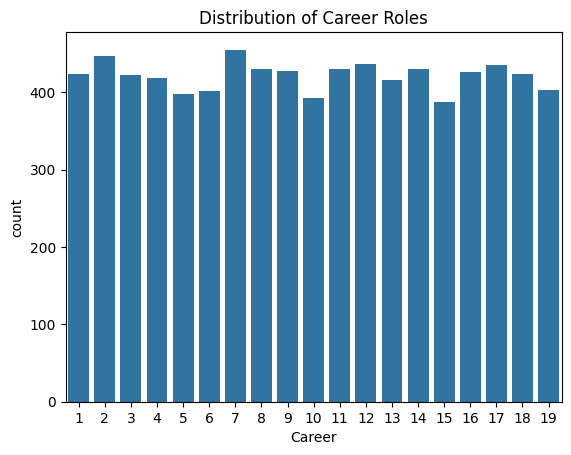

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.isnull().sum())

sns.countplot(x='Career', data=df)
plt.title('Distribution of Career Roles')
plt.show()


In [6]:
print(df.describe())

       Analytical Thinking  Problem Solving   Creativity   
count          8000.000000      8000.000000  8000.000000  \
mean              2.211000         2.666750     1.908750   
std               1.082994         1.103561     0.950677   
min               1.000000         1.000000     1.000000   
25%               1.000000         2.000000     1.000000   
50%               2.000000         3.000000     2.000000   
75%               3.000000         4.000000     2.000000   
max               4.000000         4.000000     4.000000   

       Communication Skills   Leadership      Empathy     Teamwork   
count           8000.000000  8000.000000  8000.000000  8000.000000  \
mean               2.253625     1.591500     2.035875     1.722875   
std                1.086599     0.669465     1.016719     0.803373   
min                1.000000     1.000000     1.000000     1.000000   
25%                1.000000     1.000000     1.000000     1.000000   
50%                2.000000     2.00000

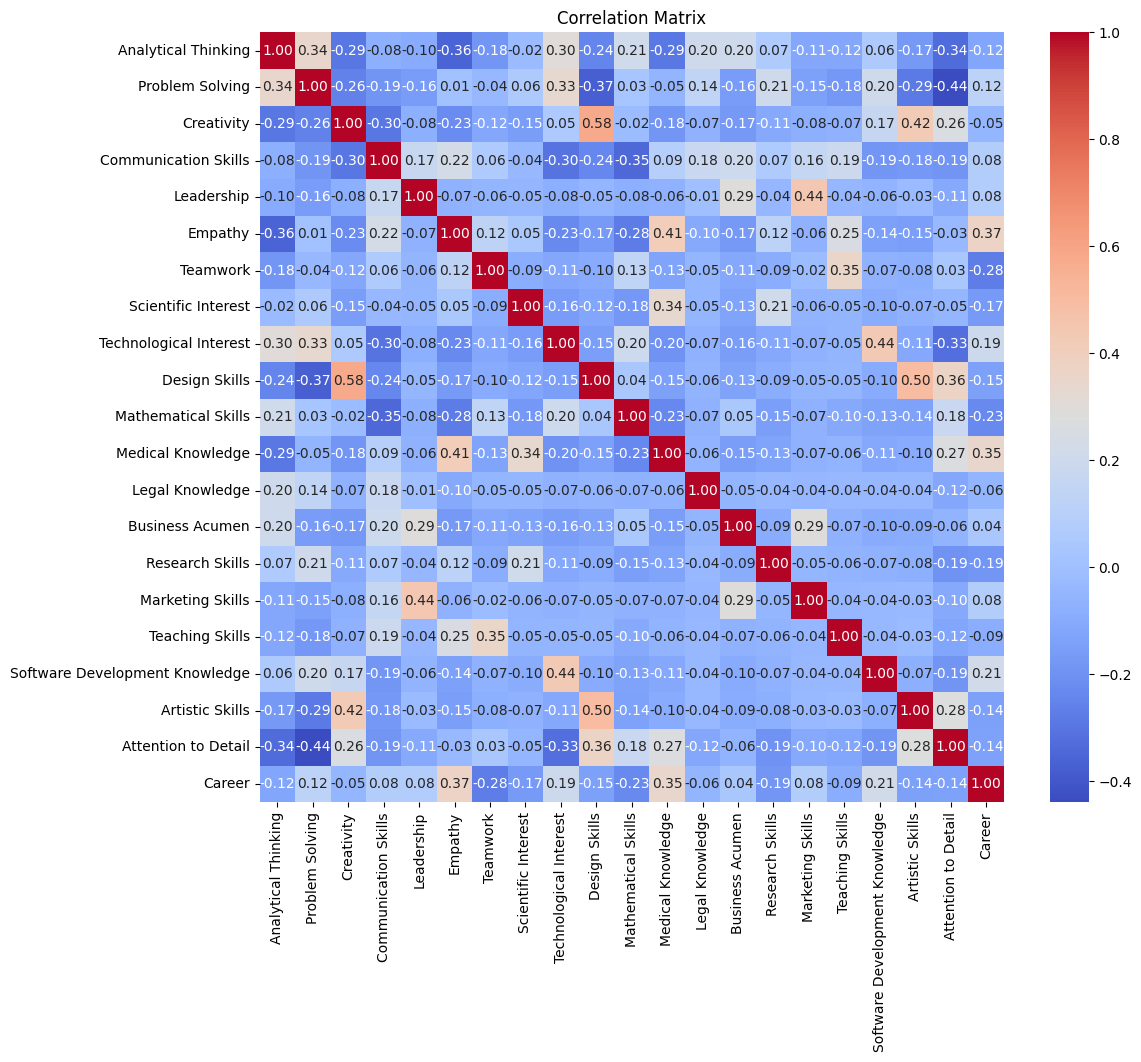

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_re, Y_re, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')

model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0  51   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43
    0]
 [  0   0   0  50   0   0   0   0   0  22   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  79   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  94   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0  94   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  92   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0  87   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  41   0   0   0   0   0  43   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0  89   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0 105   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

In [10]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']